In [1]:
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from xgboost import plot_importance


from sklearn.metrics import accuracy_score,classification_report






In [2]:
# Generating Data

X,y = make_classification(
    n_samples=1000,
    n_features=20,
    random_state=42
)

In [3]:
# Train the Data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)

In [4]:
# XGBoost with Regularization

xgb_model = XGBClassifier(

    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 3,

    reg_lambda =5,         # Increase L2 penalty
    reg_alpha =5,         # Increase L1 penalty
    random_state = 42

)

In [5]:
#Fit the model

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [6]:
# Predicting with model

y_pred = xgb_model.predict(X_test)

In [7]:
# Evaluate Performance

accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}\n")
print(f"Classification Report: {report}")

Accuracy Score: 0.8766666666666667

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.88      0.87       145
           1       0.89      0.87      0.88       155

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



<Figure size 1000x600 with 0 Axes>

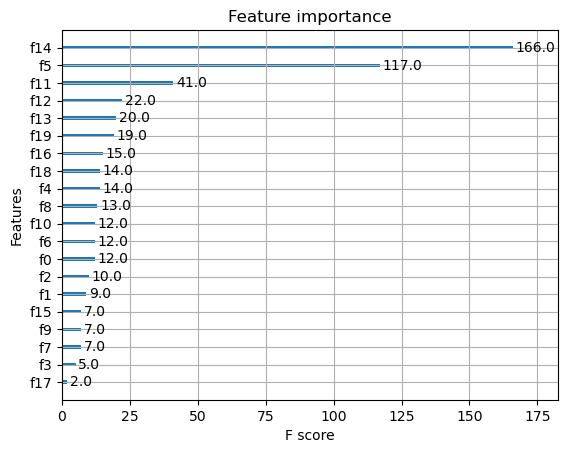

In [8]:
# Plot Feature Importance

plt.figure(figsize=(10,6))

plot_importance(xgb_model, importance_type='weight')  # 'weight' = frequency of feature usage
plt.show()